### Analysis and Prediction of Indian Liver disease Patients

- The following Jupyter notebook contains
    - Data cleaning
    - EDA
    - Data visualization
    - Linear Regression
    - Prediction

In [322]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

1.1 Loading the dataset

In [323]:
livr = pd.read_csv('indian_liver_patient.csv')

In [324]:
livr.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [325]:
livr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


- Dataset is our target variable. 1 represents 'Liver disease' and 2 represents 'normal'
- Albumin_and_Globulin_Ratio has some NULL values

1.2. Observing Null Values

In [326]:
livr.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [327]:
livr[livr.Albumin_and_Globulin_Ratio.isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


Since only 4 values are missing, dropping 4 rows.

In [328]:
livr = livr.dropna(subset=['Albumin_and_Globulin_Ratio'])

In [329]:
livr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         579 non-null    int64  
 1   Gender                      579 non-null    object 
 2   Total_Bilirubin             579 non-null    float64
 3   Direct_Bilirubin            579 non-null    float64
 4   Alkaline_Phosphotase        579 non-null    int64  
 5   Alamine_Aminotransferase    579 non-null    int64  
 6   Aspartate_Aminotransferase  579 non-null    int64  
 7   Total_Protiens              579 non-null    float64
 8   Albumin                     579 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     579 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 54.3+ KB


- Renaming column 'dataset' to disease for better interpretation
- Converting disease value to 1 and normal to 0

In [330]:
# renaming Dataset column
livr.rename(columns={'Dataset':'Disease'},inplace=True)

In [331]:
livr.Disease.value_counts()

1    414
2    165
Name: Disease, dtype: int64

The dataset contains 414 liver patients and 165 non-liver patients

#### Mapping Binary columns (Disease and Gender) to 1 & 0

In [332]:
livr_df = livr.copy(deep=True)

In [333]:
# mapping 1,2 in Disease column to 1,0
livr_df['Disease'] = livr_df.Disease.map({1:1,2:0})

In [334]:
livr_df['Gender'] = livr_df.Gender.map({'Male':1,'Female':0})

In [335]:
livr_df.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Disease
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,0.758204,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,0.715026
std,16.221786,0.428542,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


We see that in some columns there can be outliers

#### 2. Data visualization

Average age of each gender for Liver diease

In [336]:
livr['Disease'] = livr.Disease.map({1:'Liver_patient',2:'Non_liver_patient'})

In [337]:
livr[['Disease','Gender','Age']].groupby(['Disease','Gender']).mean().sort_values('Disease')

Age
Disease           Gender           
Liver_patient     Female  43.329670
                  Male    46.938080
Non_liver_patient Female  42.897959
                  Male    40.715517

The average age of males having liver disease is significantly more than normal patients.

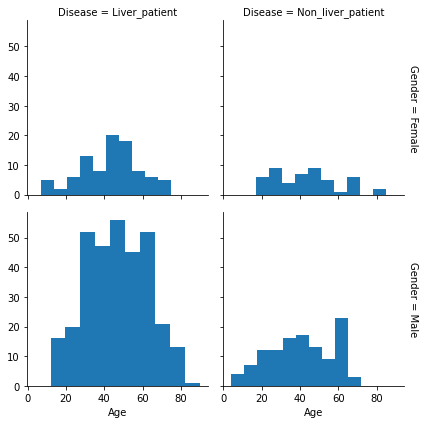

In [338]:
fig = sns.FacetGrid(livr, col="Disease", row="Gender",margin_titles=True)

fig.map(plt.hist,'Age')

Most number of liver disease patients are middle aged males.

<AxesSubplot:xlabel='Age', ylabel='Count'>

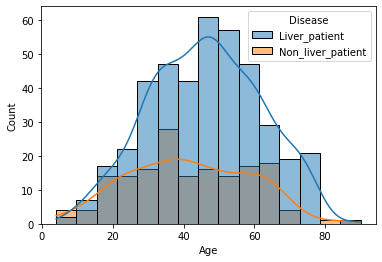

In [339]:
sns.histplot(x='Age',hue='Disease',data=livr,kde=True)

Plotting relation between Direct bilurubin and Total Bilurubin

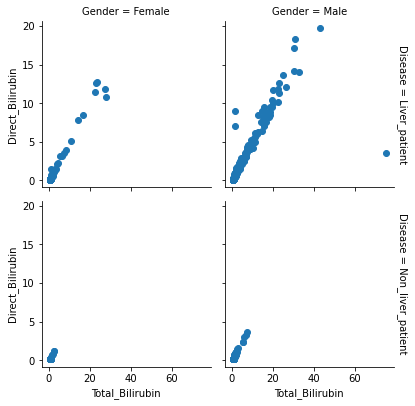

In [340]:
fig = sns.FacetGrid(livr,row='Disease',col='Gender',margin_titles=True)
fig.map(plt.scatter,'Total_Bilirubin','Direct_Bilirubin')
plt.subplots_adjust(top=0.9)

Total Bilirubin and Direct Bilirubin are collinear.

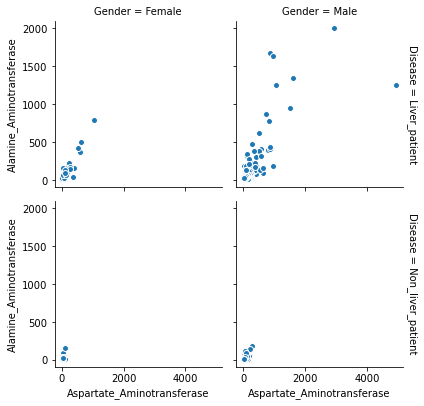

In [341]:
fig = sns.FacetGrid(livr, col="Gender", row="Disease", margin_titles=True)
fig.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

Aspartate_Aminotransferase and Alamine_Aminotransferase show linear relationship

Creating new DF livr_eda for visual analysis

In [342]:
livr_eda = livr.copy(deep=True)

Removing outliers for better visualisaiton

In [343]:
num_cols = ['Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio']

In [344]:
# Making outliers null

for x in ['Total_Bilirubin']:
    q75,q25 = np.percentile(livr_eda.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    livr_eda.loc[livr_eda[x] < min,x] = np.nan
    livr_eda.loc[livr_eda[x] > max,x] = np.nan


for x in ['Direct_Bilirubin']:
    q75,q25 = np.percentile(livr_eda.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    livr_eda.loc[livr_eda[x] < min,x] = np.nan
    livr_eda.loc[livr_eda[x] > max,x] = np.nan


for x in ['Alkaline_Phosphotase']:
    q75,q25 = np.percentile(livr_eda.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    livr_eda.loc[livr_eda[x] < min,x] = np.nan
    livr_eda.loc[livr_eda[x] > max,x] = np.nan

    
for x in ['Alamine_Aminotransferase']:
    q75,q25 = np.percentile(livr_eda.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    livr_eda.loc[livr_eda[x] < min,x] = np.nan
    livr_eda.loc[livr_eda[x] > max,x] = np.nan
    
for x in ['Aspartate_Aminotransferase']:
    q75,q25 = np.percentile(livr_eda.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    livr_eda.loc[livr_eda[x] < min,x] = np.nan
    livr_eda.loc[livr_eda[x] > max,x] = np.nan
    
for x in ['Total_Protiens']:
    q75,q25 = np.percentile(livr_eda.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    livr_eda.loc[livr_eda[x] < min,x] = np.nan
    livr_eda.loc[livr_eda[x] > max,x] = np.nan
    
for x in ['Albumin']:
    q75,q25 = np.percentile(livr_eda.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    livr_eda.loc[livr_eda[x] < min,x] = np.nan
    livr_eda.loc[livr_eda[x] > max,x] = np.nan
    
for x in ['Albumin_and_Globulin_Ratio']:
    q75,q25 = np.percentile(livr_eda.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    livr_eda.loc[livr_eda[x] < min,x] = np.nan
    livr_eda.loc[livr_eda[x] > max,x] = np.nan


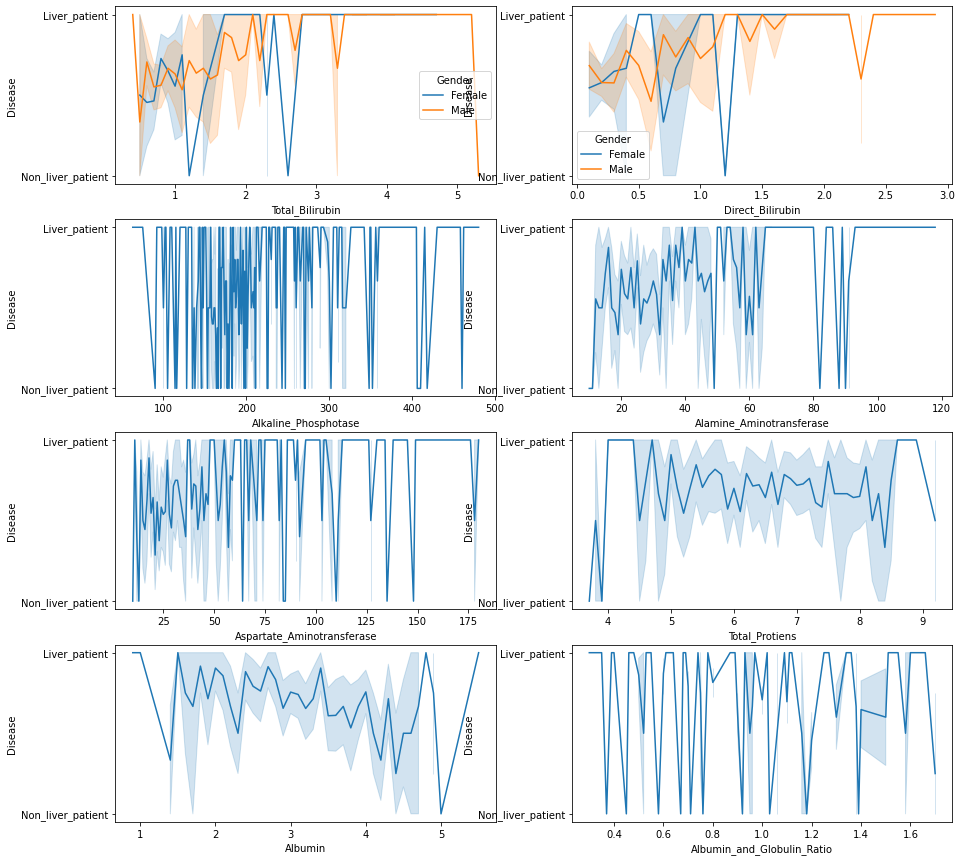

In [345]:
fig,ax = plt.subplots(4,2,figsize=(15,15))

sns.lineplot(data=livr_eda,x='Total_Bilirubin',y='Disease',hue='Gender',ax=ax[0,0])
sns.lineplot(data=livr_eda,x='Direct_Bilirubin',y='Disease',hue='Gender',ax=ax[0,1])
sns.lineplot(data=livr_eda,x='Alkaline_Phosphotase',y='Disease',ax=ax[1,0])
sns.lineplot(data=livr_eda,x='Alamine_Aminotransferase',y='Disease',ax=ax[1,1])
sns.lineplot(data=livr_eda,x='Aspartate_Aminotransferase',y='Disease',ax=ax[2,0])
sns.lineplot(data=livr_eda,x='Total_Protiens',y='Disease',ax=ax[2,1])
sns.lineplot(data=livr_eda,x='Albumin',y='Disease',ax=ax[3,0])
sns.lineplot(data=livr_eda,x='Albumin_and_Globulin_Ratio',y='Disease',ax=ax[3,1])

plt.show()

High levels of direct & toal bilirubin is related to liver disease cases. The trend is more prominent in males.

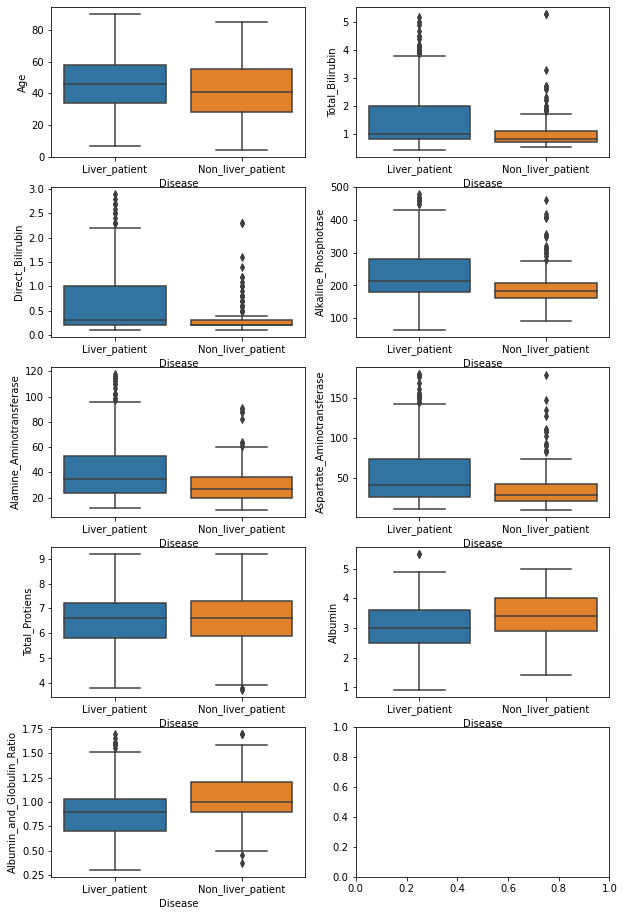

In [346]:
# Box plots of variables

fig,ax = plt.subplots(5,2,figsize=(10,16))

sns.boxplot(x='Disease',y='Age',data=livr_eda,ax=ax[0,0])
sns.boxplot(x='Disease',y='Total_Bilirubin',data=livr_eda,ax=ax[0,1])
sns.boxplot(x='Disease',y='Direct_Bilirubin',data=livr_eda,ax=ax[1,0])
sns.boxplot(x='Disease',y='Alkaline_Phosphotase',data=livr_eda,ax=ax[1,1])
sns.boxplot(x='Disease',y='Alamine_Aminotransferase',data=livr_eda,ax=ax[2,0])
sns.boxplot(x='Disease',y='Aspartate_Aminotransferase',data=livr_eda,ax=ax[2,1])
sns.boxplot(x='Disease',y='Total_Protiens',data=livr_eda,ax=ax[3,0])
sns.boxplot(x='Disease',y='Albumin',data=livr_eda,ax=ax[3,1])
sns.boxplot(x='Disease',y='Albumin_and_Globulin_Ratio',data=livr_eda,ax=ax[4,0])

plt.show()

- Median Age is **high** in liver disease patients
- Median Alkaline Phosphotase levels are **high** in liver disease patients
- Median Alamine Aminotransferase levels are **high** in liver disease patients
- Median Aspartate_Aminotransferase levels are **high** in liver disease patients
- Median Albumin levels are **low** in liver disease patients
- Median Albumin Globulin Ratio levels are **low** in liver disease patients

2.2 Visualizing correlation 

<AxesSubplot:>

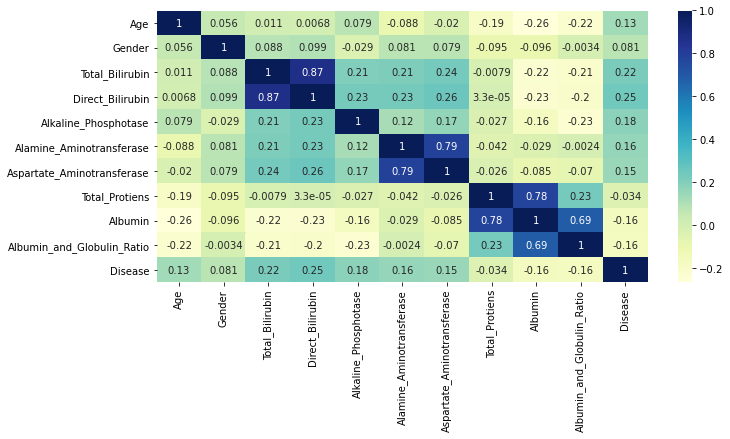

In [347]:
plt.figure(figsize=(11,5))
sns.heatmap(livr_df.corr(),annot=True,cmap='YlGnBu')

### 3: Data transformation
- Encoding:
    - Converting binary vars to 1 & 0
    - Converting other categ vars to dummy variables
- Splitting of Dataset
- Scaling of variables

Done in earlier steps

2.2. Splitting Data

In [348]:
import sklearn
from sklearn.model_selection import train_test_split

In [349]:
df_train,df_test = train_test_split(livr_df, train_size=0.7,test_size=0.3, random_state=100)

print(df_train.shape)
print(df_test.shape)

(405, 11)
(174, 11)


2.3. Scaling

In [350]:
livr_df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Disease'],
      dtype='object')

In [351]:
num_col = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio']

In [352]:
from sklearn.preprocessing import StandardScaler

In [353]:
# using StandardScaler method of scaling
scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])

In [354]:
df_train.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Disease
444,0.975166,1,-0.420784,-0.440522,-0.533066,-0.411009,-0.301649,-0.168344,-0.455374,-0.490095,0
481,-0.004992,1,-0.157875,-0.062459,-0.070238,0.486257,0.934373,0.773358,1.083650,0.726506,1
207,-0.311291,1,0.122561,0.075019,0.194235,6.924537,4.943479,0.208337,0.827146,1.030656,1
575,-0.801370,1,3.820809,4.199341,1.010990,-0.229982,-0.057278,1.338379,-0.840129,4.680460,1
100,-1.107669,1,-0.455838,-0.440522,-0.540844,-0.340172,-0.269775,-2.616768,-1.994397,-0.611755,0


### 3. Building model
        - Splitting train dataset into X and y
        - Adding constant
        - model fitting
        - model summary

3.1. Splitting into X and y

In [355]:
X_train = df_train.drop('Disease',axis=1)

In [356]:
y_train = df_train['Disease']

3.2. Adding constant to X_train 

In [357]:
import statsmodels.api as sm

In [358]:
X_train_sm = sm.add_constant(X_train)

3.3. Fitting the model

In [359]:
lr = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())

lr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Disease   No. Observations:                  405
Model:                            GLM   Df Residuals:                      394
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 18 Dec 2022   Deviance:                          nan
Time:                        15:52:27   Pearson chi2:                     391.
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          2.0023      0.391      5.127      0.000       1.237       2.768
Age                            0.3452      0.126      2.742      0.006       0.098       0.592
Gender                         0.1170      0.286      0.409      0.683      -0.444       0.678
Total_Bilirubin               -0.9418      3.007     -0.313      0.754      -6.836       4.952
Direct_Bilirubin               2.0060      2.897      0.692      0.489      -3.672       7.684
Alkaline_Phosphotase           0.2140      0.245      0.873      0.383      -0.267       0.695
Alamine_Aminotransferase       2.3702      0.955      2.481      0.013       0.498       4.243
Aspartate_Aminotransferase     0.9590      1.200      0.799      0.424      -1.393       3.310
Total_Protiens                 1.3802      0.519      2.661      0.008       0.364       2.397
Albumin                       -1.8903      0.742     -2.546      0.011      -3.345      -0.435
Albumin_and_Globulin_Ratio     0.7956      0.470      1.692      0.091      -0.126       1.717
==============================================================================================
"""

High p-values due to multicollinearity

### Automatic feature selection using RFE

In [360]:
from sklearn.linear_model import LogisticRegression

In [361]:
logreg = LogisticRegression()

In [362]:
from sklearn.feature_selection import RFE

In [363]:
rfe = RFE(logreg,8)
rfe = rfe.fit(X_train, y_train)

In [364]:
rfe.support_

array([ True, False,  True,  True, False,  True,  True,  True,  True,
        True])

In [365]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Age', True, 1),
 ('Gender', False, 3),
 ('Total_Bilirubin', True, 1),
 ('Direct_Bilirubin', True, 1),
 ('Alkaline_Phosphotase', False, 2),
 ('Alamine_Aminotransferase', True, 1),
 ('Aspartate_Aminotransferase', True, 1),
 ('Total_Protiens', True, 1),
 ('Albumin', True, 1),
 ('Albumin_and_Globulin_Ratio', True, 1)]

In [366]:
col = X_train.columns[rfe.support_]
col

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio'],
      dtype='object')

In [367]:
X_train_new = X_train[col]
X_train_new.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio'],
      dtype='object')

In [368]:
logreg2 = sm.GLM(y_train, sm.add_constant(X_train_new), family = sm.families.Binomial())
mod_1 = logreg2.fit()
mod_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Disease   No. Observations:                  405
Model:                            GLM   Df Residuals:                      396
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 18 Dec 2022   Deviance:                          nan
Time:                        15:52:28   Pearson chi2:                     350.
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          2.1436      0.310      6.920      0.000       1.536       2.751
Age                            0.3449      0.126      2.743      0.006       0.098       0.591
Total_Bilirubin               -1.0101      3.022     -0.334      0.738      -6.934       4.913
Direct_Bilirubin               2.1969      2.908      0.755      0.450      -3.503       7.896
Alamine_Aminotransferase       2.5443      0.958      2.657      0.008       0.668       4.421
Aspartate_Aminotransferase     1.0246      1.228      0.834      0.404      -1.383       3.432
Total_Protiens                 1.3593      0.522      2.602      0.009       0.336       2.383
Albumin                       -1.8583      0.746     -2.492      0.013      -3.320      -0.397
Albumin_and_Globulin_Ratio     0.7532      0.469      1.605      0.109      -0.167       1.673
==============================================================================================
"""

#### Checking VIFs

In [369]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [370]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total_Bilirubin,36.30
2,Direct_Bilirubin,36.28
6,Albumin,8.62
5,Total_Protiens,4.84
7,Albumin_and_Globulin_Ratio,3.30
4,Aspartate_Aminotransferase,2.79
3,Alamine_Aminotransferase,2.78
0,Age,1.09


Dropping Total_Bilirubin

In [371]:
X_train_new = X_train_new.drop('Total_Bilirubin',axis=1)

### Model 3

In [372]:
logreg3 = sm.GLM(y_train, sm.add_constant(X_train_new), family = sm.families.Binomial())
mod_2 = logreg3.fit()
mod_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Disease   No. Observations:                  405
Model:                            GLM   Df Residuals:                      397
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 18 Dec 2022   Deviance:                          nan
Time:                        15:52:29   Pearson chi2:                     352.
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          2.1536      0.312      6.913      0.000       1.543       2.764
Age                            0.3444      0.126      2.737      0.006       0.098       0.591
Direct_Bilirubin               1.2582      0.656      1.918      0.055      -0.028       2.544
Alamine_Aminotransferase       2.5166      0.952      2.644      0.008       0.651       4.382
Aspartate_Aminotransferase     1.0300      1.230      0.837      0.402      -1.381       3.441
Total_Protiens                 1.3699      0.521      2.629      0.009       0.349       2.391
Albumin                       -1.8707      0.744     -2.513      0.012      -3.329      -0.412
Albumin_and_Globulin_Ratio     0.7604      0.468      1.624      0.104      -0.157       1.678
==============================================================================================
"""

#### Checking VIFs

In [373]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [374]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Albumin,8.61
4,Total_Protiens,4.84
6,Albumin_and_Globulin_Ratio,3.27
2,Alamine_Aminotransferase,2.78
3,Aspartate_Aminotransferase,2.78
1,Direct_Bilirubin,1.31
0,Age,1.09


### Model 4

Removing Albumin

In [375]:
X_train_new = X_train_new.drop('Albumin',axis=1)

In [376]:
logreg4 = sm.GLM(y_train, sm.add_constant(X_train_new), family = sm.families.Binomial())
mod_3 = logreg4.fit()
mod_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Disease   No. Observations:                  405
Model:                            GLM   Df Residuals:                      398
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 18 Dec 2022   Deviance:                          nan
Time:                        15:52:29   Pearson chi2:                     354.
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          2.0819      0.300      6.941      0.000       1.494       2.670
Age                            0.3468      0.125      2.767      0.006       0.101       0.593
Direct_Bilirubin               1.4784      0.621      2.382      0.017       0.262       2.695
Alamine_Aminotransferase       1.8981      0.859      2.210      0.027       0.215       3.581
Aspartate_Aminotransferase     1.6860      1.270      1.327      0.184      -0.804       4.175
Total_Protiens                 0.1049      0.131      0.799      0.424      -0.153       0.362
Albumin_and_Globulin_Ratio    -0.3284      0.148     -2.225      0.026      -0.618      -0.039
==============================================================================================
"""

#### Checking VIFs

In [377]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [378]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Alamine_Aminotransferase,2.72
3,Aspartate_Aminotransferase,2.72
5,Albumin_and_Globulin_Ratio,1.14
0,Age,1.09
1,Direct_Bilirubin,1.08
4,Total_Protiens,1.08


### Model 5

Removing Total_Protiens

In [379]:
X_train_new = X_train_new.drop('Total_Protiens',axis=1)

In [380]:
logreg5 = sm.GLM(y_train, sm.add_constant(X_train_new), family = sm.families.Binomial())
mod_4 = logreg5.fit()
mod_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Disease   No. Observations:                  405
Model:                            GLM   Df Residuals:                      399
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 18 Dec 2022   Deviance:                          nan
Time:                        15:52:30   Pearson chi2:                     355.
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          2.0729      0.300      6.907      0.000       1.485       2.661
Age                            0.3328      0.124      2.686      0.007       0.090       0.576
Direct_Bilirubin               1.4975      0.629      2.379      0.017       0.264       2.731
Alamine_Aminotransferase       1.9321      0.861      2.245      0.025       0.245       3.619
Aspartate_Aminotransferase     1.5857      1.254      1.265      0.206      -0.871       4.043
Albumin_and_Globulin_Ratio    -0.3012      0.144     -2.091      0.037      -0.584      -0.019
==============================================================================================
"""

#### Checking VIFs

In [381]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [382]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Alamine_Aminotransferase,2.71
3,Aspartate_Aminotransferase,2.71
4,Albumin_and_Globulin_Ratio,1.09
1,Direct_Bilirubin,1.08
0,Age,1.07


### Model 6

Removing Aspartate_Aminotransferase

In [383]:
X_train_new = X_train_new.drop('Aspartate_Aminotransferase',axis=1)

In [384]:
logreg6 = sm.GLM(y_train, sm.add_constant(X_train_new), family = sm.families.Binomial())
mod_5 = logreg6.fit()
mod_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Disease   No. Observations:                  405
Model:                            GLM   Df Residuals:                      400
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -193.92
Date:                Sun, 18 Dec 2022   Deviance:                       387.84
Time:                        15:52:30   Pearson chi2:                     385.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          2.0252      0.293      6.902      0.000       1.450       2.600
Age                            0.3418      0.123      2.769      0.006       0.100       0.584
Direct_Bilirubin               1.6935      0.632      2.680      0.007       0.455       2.932
Alamine_Aminotransferase       2.7114      0.694      3.907      0.000       1.351       4.072
Albumin_and_Globulin_Ratio    -0.3064      0.143     -2.149      0.032      -0.586      -0.027
==============================================================================================
"""

#### Checking VIFs

In [385]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [386]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Albumin_and_Globulin_Ratio,1.09
1,Direct_Bilirubin,1.07
0,Age,1.06
2,Alamine_Aminotransferase,1.05


### Making predictions

In [387]:
y_train_pred = mod_5.predict(sm.add_constant(X_train_new)).values.reshape(-1)

In [388]:
y_train_pred_final = pd.DataFrame({'Disease':y_train.values, 'dis_prob':y_train_pred})
y_train_pred_final['pat_id'] = y_train.index
y_train_pred_final.head()

,Disease,dis_prob,pat_id
0,0,0.656615,444
1,1,0.953180,481
2,1,1.000000,207
3,1,0.998893,575
4,0,0.541307,100


In [389]:
# Rearranging the columns
y_train_pred_final = y_train_pred_final.reindex(['pat_id','Disease','dis_prob'], axis=1)

In [390]:
y_train_pred_final['dis_pred'] = y_train_pred_final.dis_prob.map(lambda x: 1 if x > 0.5 else 0)

In [391]:
y_train_pred_final

,pat_id,Disease,dis_prob,dis_pred
0,444,0,0.656615,1
1,481,1,0.953180,1
2,207,1,1.000000,1
3,575,1,0.998893,1
4,100,0,0.541307,1
...,...,...,...,...
400,530,0,0.383380,0
401,53,1,0.786367,1
402,354,1,0.583945,1
403,79,1,0.895251,1


### 5: Confusion Matrix
- Sensitivity
- Specificity
- TPR, FPR
- ROC curve

In [392]:
from sklearn import metrics

In [393]:
confusion = metrics.confusion_matrix(y_train_pred_final.Disease,y_train_pred_final.dis_pred)
confusion

array([[ 36,  77],
       [ 22, 270]], dtype=int64)

In [394]:
TN = 36
TP = 270
FP = 77
FN = 22

In [395]:
# Sensitivity
TP/(TP + FN)

0.9246575342465754

In [396]:
# Specificty
TN/(TN + FP)

0.3185840707964602

In [397]:
# Accuracy
(TP+TN)/(TP+TN+FP+FN)

0.7555555555555555

- Specificity is less

### ROC curve

In [398]:
def draw_roc(actual, probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (AUC = %0.2f)'%auc_score) # 0.2f means that only 2 decimals after the number will be displayed
    plt.plot([0,1],[0,1],'k--')  # K-- means that line will be made of dashes'--'
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC curve')
    plt.legend(loc='lower right')
    plt.show()
    
    return None


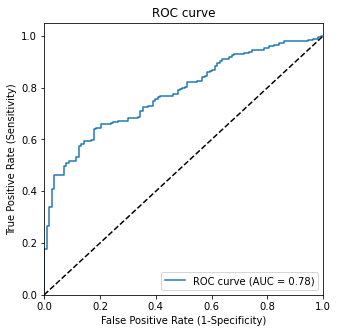

In [399]:
draw_roc(y_train_pred_final.Disease,y_train_pred_final.dis_prob)

### Finding optimal cut-off point

In [400]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for i in num:
    y_train_pred_final[i] = y_train_pred_final.dis_prob.map(lambda x: 1 if x > i else 0)

In [401]:
y_train_pred_final.head()

,pat_id,Disease,dis_prob,dis_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1
0,444,0,0.656615,1,1,1,1,1,1,1,1,0,0,0,0
1,481,1,0.953180,1,1,1,1,1,1,1,1,1,1,1,0
2,207,1,1.000000,1,1,1,1,1,1,1,1,1,1,1,0
3,575,1,0.998893,1,1,1,1,1,1,1,1,1,1,1,0
4,100,0,0.541307,1,1,1,1,1,1,1,0,0,0,0,0


In [402]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['tresh_prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Disease, y_train_pred_final[i] )
    
    TN = cm1[0,0]
    FP = cm1[0,1]
    FN = cm1[1,0]
    TP = cm1[1,1]
    
    total1=sum(sum(cm1))             # this gives total number of datapoints
    
    accuracy = round((TP+TN)/total1,2)
    
    speci = round(TN/(TN + FP),2)
    sensi = round(TP/(TP + FN),2)
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

cutoff_df

,tresh_prob,accuracy,sensi,speci
0.0,0.0,0.72,1.00,0.00
0.1,0.1,0.72,1.00,0.00
0.2,0.2,0.72,1.00,0.00
0.3,0.3,0.72,1.00,0.01
0.4,0.4,0.74,0.98,0.11
0.5,0.5,0.76,0.92,0.32
0.6,0.6,0.70,0.77,0.54
0.7,0.7,0.69,0.64,0.80
0.8,0.8,0.61,0.48,0.93
0.9,0.9,0.52,0.35,0.97


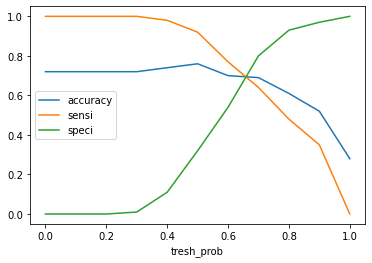

In [403]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='tresh_prob', y=['accuracy','sensi','speci'])
plt.show()

#### Since we want majority of Liver patients to be identified we would proceed with 0.65 as cutoff

### Making predictions on test set

In [404]:
df_test.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Disease
550,46,1,3.3,1.5,172,25,41,5.6,2.4,0.70,1
518,45,1,2.9,1.4,210,74,68,7.2,3.6,1.00,1
507,50,1,0.9,0.3,194,190,73,7.5,3.9,1.00,1
114,50,1,5.8,3.0,661,181,285,5.7,2.3,0.67,0
424,32,0,0.7,0.1,240,12,15,7.0,3.0,0.70,1


#### Scaling test data

In [405]:
num_col = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio']

In [406]:
df_test[num_col] = scaler.transform(df_test[num_col])

#### Splitting test data

In [407]:
X_test = df_test.drop('Disease',axis=1)
y_test = df_test['Disease']

In [408]:
# removing columns from test set
X_test_new = X_test[X_train_new.columns]

In [409]:
# adding constant
X_test_sm = sm.add_constant(X_test_new)

In [410]:
# y_test prediction
y_test_pred = mod_5.predict(X_test_sm).values.reshape(-1)

In [411]:
# y_test dataframe
y_test_df = pd.DataFrame({'Disease':y_test.values, 'dis_prob':y_test_pred})
y_test_df['pat_id'] = y_test.index
y_test_df.head()

,Disease,dis_prob,pat_id
0,1,0.791403,550
1,1,0.882916,518
2,1,0.981299,507
3,0,0.996486,114
4,1,0.486982,424


In [412]:
# mapping values at cutoff 0.6
y_test_df['dis_pred'] = y_test_df.dis_prob.map(lambda x: 1 if x > 0.6 else 0)

#### Confusion matrix on y_test_df

In [413]:
confusion = metrics.confusion_matrix(y_test_df.Disease,y_test_df.dis_pred)
confusion

array([[24, 28],
       [35, 87]], dtype=int64)

In [414]:
TN = confusion[0,0]
TP = confusion[1,1]
FP = confusion[0,1]
FN = confusion[1,0]

In [415]:
# Sensitivity
TP/(TP + FN)

0.7131147540983607

In [416]:
# Specificty
TN/(TN + FP)

0.46153846153846156

In [417]:
# Accuracy
(TP+TN)/(TP+TN+FP+FN)

0.6379310344827587

### - Conclusion
- We are able to predict liver disease patients with a sensitivity of 71%, specificity of 46% and accuracy of 64%.
- This model can be used as an early indication towards liver disease and screen out probable liver disease patients.